In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to C:\Users\Sayali
[nltk_data]     Suryawanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
df = pd.read_csv('tweets.csv') 

In [52]:
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   Tweet content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [54]:
import re
# Function to clean tweet content
def clean_text(tweet_content):
    tweet_content = re.sub(r'http\S+', '', tweet_content)  # Remove URLs
    tweet_content = re.sub(r'[^A-Za-z\s]', '', tweet_content)  # Remove special characters
    tweet_content = tweet_content.lower()  # Convert to lowercase
    return tweet_content

In [62]:
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claim...
2,8312,Microsoft,Negative,microsoft why do i pay for word when it functi...
3,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,now the president is slapping americans in the...


In [63]:
# Apply the clean_text function to the 'Tweet content' column
df['Tweet content'] = df['Tweet content'].apply(clean_text)

# Display the cleaned DataFrame
print(df)

     Tweet ID               entity   sentiment  \
0        3364             Facebook  Irrelevant   
1         352               Amazon     Neutral   
2        8312            Microsoft    Negative   
3        4371                CS-GO    Negative   
4        4433               Google     Neutral   
..        ...                  ...         ...   
995      4891  GrandTheftAuto(GTA)  Irrelevant   
996      4359                CS-GO  Irrelevant   
997      2652          Borderlands    Positive   
998      8069            Microsoft    Positive   
999      6960      johnson&johnson     Neutral   

                                         Tweet content  
0    i mentioned on facebook that i was struggling ...  
1    bbc news  amazon boss jeff bezos rejects claim...  
2    microsoft why do i pay for word when it functi...  
3    csgo matchmaking is so full of closet hacking ...  
4    now the president is slapping americans in the...  
..                                                 ...  


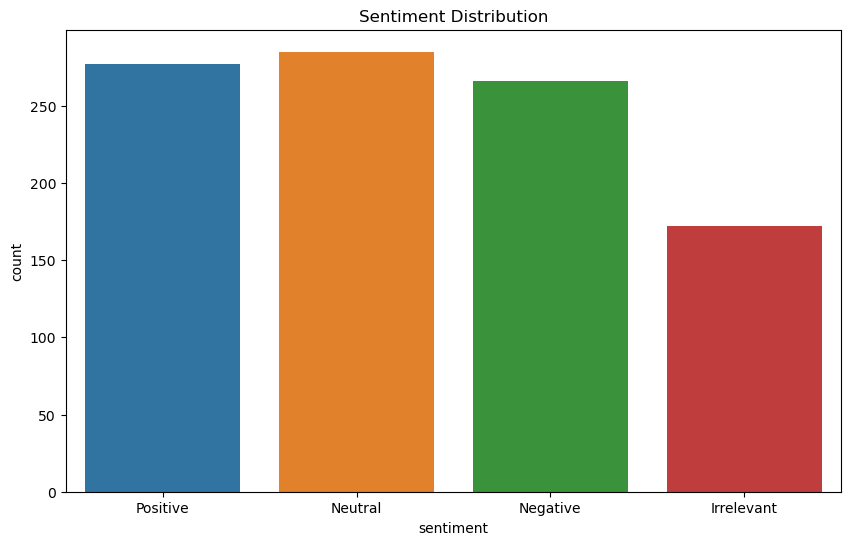

In [65]:
# Count plot for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative','Irrelevant' ])
plt.title('Sentiment Distribution')
plt.show()


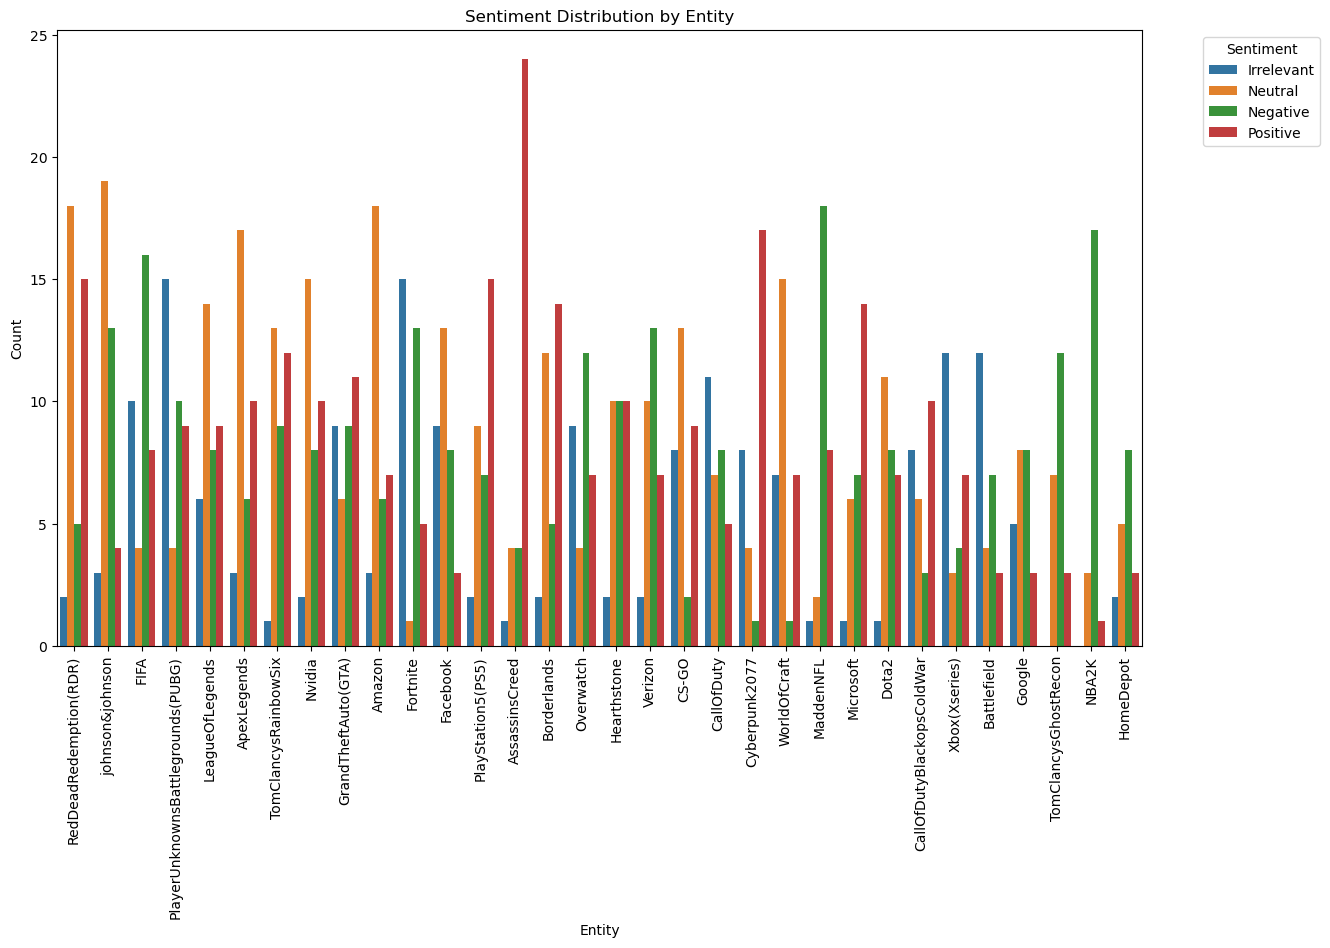

In [66]:
# Count plot for sentiment distribution by entity
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='entity', hue='sentiment', order=df['entity'].value_counts().index)
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [67]:
# Function to generate word cloud
def generate_word_cloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

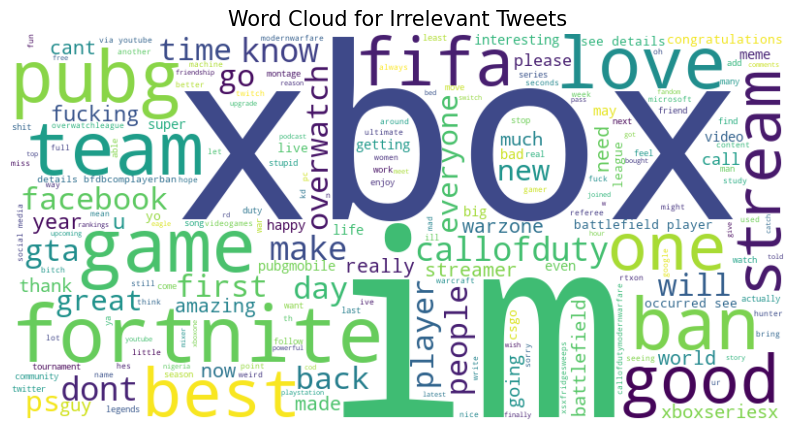

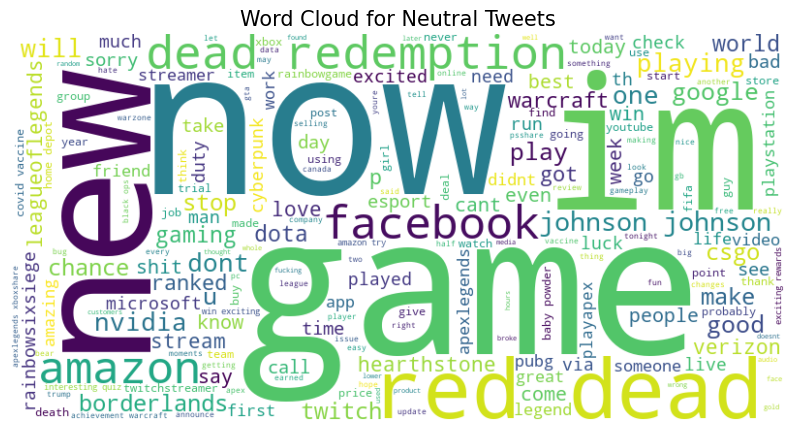

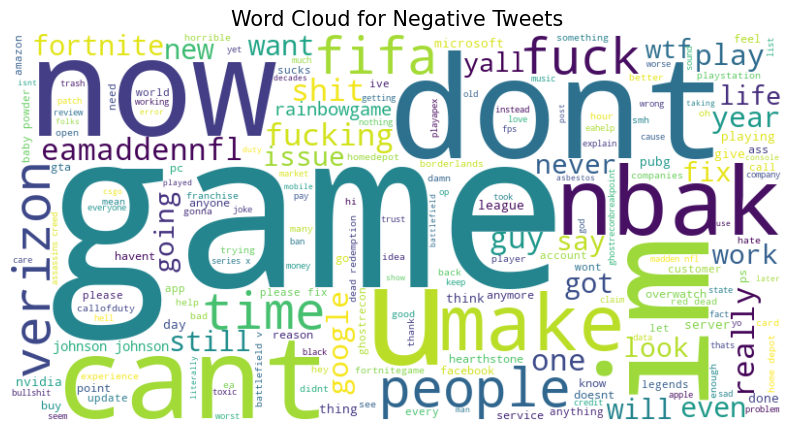

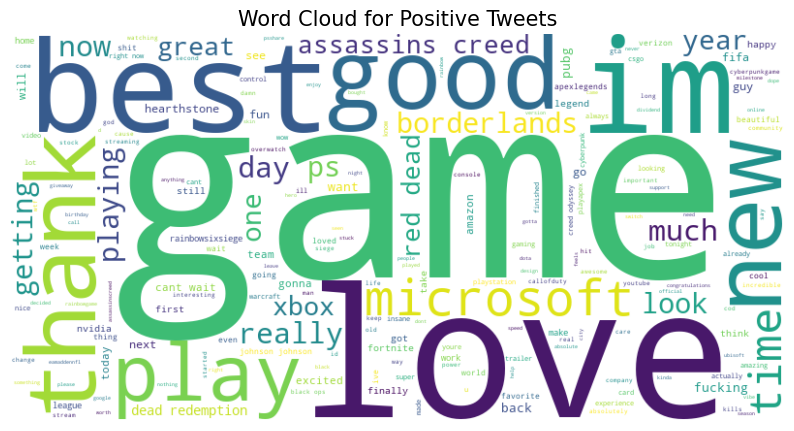

In [61]:
#  Generate word cloud for each sentiment
for sentiment in df['sentiment'].unique():
    sentiment_data = df[df['sentiment'] == sentiment]['Tweet content']
    generate_word_cloud(sentiment_data, f'Word Cloud for {sentiment} Tweets')